In [1]:
from sklearn import metrics
from matplotlib import pyplot
from numpy import loadtxt
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
def AUC(language, r):
    """
    This function:
        - loads anomaly scores for the self-language (English) and inputted anomalous language
        for specified r value
        - computes sensitivity and specificity values
        - plots the corresponding ROC curve
        - computes and returns the AUC corresponding to the curve
    Input: language as one-letter string, r as integer (max contiguous substring of length r)
    Output: ROC curve and AUC value.
    """
    filename1 = "output_e" + str(r) + ".txt"
    filename2 = "output_" + language + str(r) + ".txt"
    arr_self = loadtxt(filename1, delimiter="'\n'")
    arr_an = loadtxt(filename2, delimiter="'\n'")
    arr_merged = np.append(arr_self, arr_an)
    arr_merged.sort()
    arr_merged_u = np.unique(arr_merged)
    
    sens = [len([a_s for a_s in arr_an if a_s > score])/len(arr_an) for score in arr_merged_u]
    spec = [len([a_s for a_s in arr_self if a_s <= score])/len(arr_self) for score in arr_merged_u]
    spec_inv = [1-s for s in spec]
    
    sens = np.append(np.append(1, sens),0)
    spec_inv = np.append(np.append(1, spec_inv),0)
    
    auc = metrics.auc(sens, np.append(np.append(0,spec),1))
    
    plt.plot(spec_inv, sens)
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.xlabel('1-specificity')
    plt.ylabel('sensitivity')
    t_string = 'ROC for r=' + str(r) + ' with AUC = ' + str(auc)
    plt.title(t_string)
    
    return auc

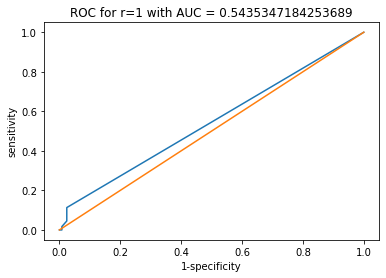

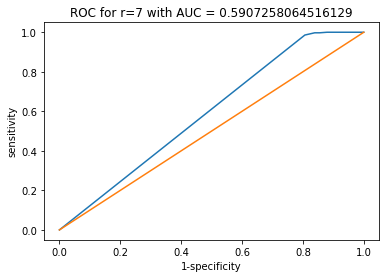

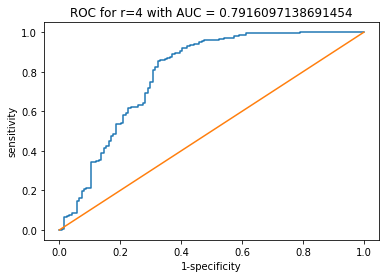

In [3]:
""" TASK 1"""
for r in [1,7,4]:
    plt.figure(r) 
    AUC('t',r)

# Curves in figure 1 belong to r=1, r=7 and r=4 respectively
# We find the best AUC score for r=3: AUC=0.8311

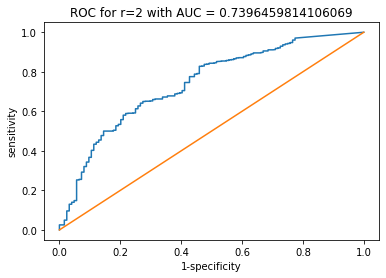

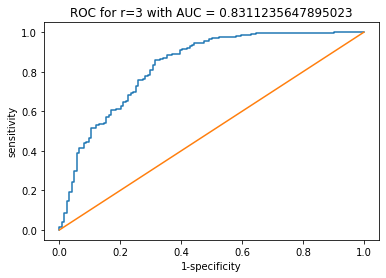

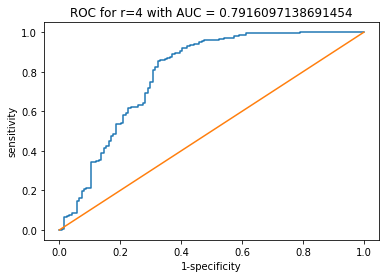

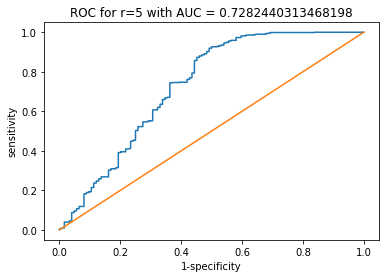

In [4]:
""" TASK 2"""
for r in [2,3,4,5]:
    plt.figure(r) 
    AUC('t',r)

# We find the best AUC score for r=3: AUC=0.8311
# Thus forward in this assignment, we will use r=3 

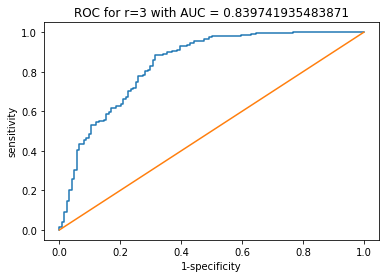

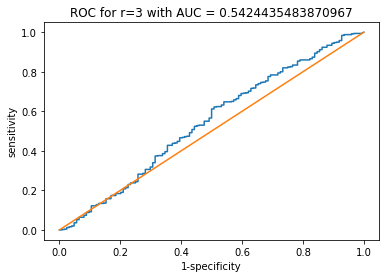

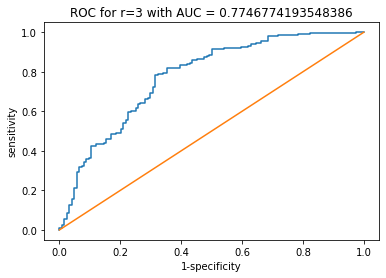

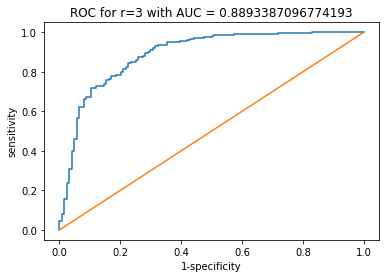

In [5]:
"""TASK 3 """
i=0
for language in ['h','m','p','x']:
    plt.figure(i)
    i+= 1
    AUC(language,r=3)
    
# We find the highest AUC for language Xhosa and the lowest AUC for Middle-English. 
# Middle-English looks the most alike English, thus is hard to distinguish from the self-language,
# resulting in a poor AUC value

In [6]:
"""
NEXT TASK
"""

'\nNEXT TASK\n'

In [32]:
def preprocess_train(file, n):
    """
    Preprocesses train file by finding all substrings of length n for each item in the train set. 
    If an item is smaller than length n, it is padded with '_' until it is of length n.
    Input: filename of the train file and integer n (destined length of strings).
    Output: Numpy array of n-length chunked test strings.
    """
    def find_substrings(line, n):
        return np.array([line[i: j] for i in range(len(line)) for j in range(i + 1, len(line) + 1) if len(line[i:j]) == n])
    
    train = loadtxt(file, delimiter="'\n'", dtype=str)
    train_processed = np.array([])
    for i in range(len(train)):
        if len(train[i])<n:
            line = train[i] + ';'*(n-len(train[i]))
            train_processed = np.append(train_processed, line).flatten()
        else:
            train_processed = np.append(train_processed, find_substrings(train[i], n)).flatten()
    return train_processed

In [33]:
def preprocess_test(file, labelfile, n):
    """
    Preprocesses test and labels file by finding all substrings of length n for each item in the train set. 
    If an item is smaller than length n, it is padded with '_' until it is of length n.
    Input: filename of the train file, filename of labels file and integer n (destined length of strings).
    Output: Three same length Numpy arrays: 
        - All n-length chunked test strings.
        - Labels per chunk
        - Corresponding initial string/item index
    """
    def find_substrings(line, n):
        return np.array([line[i: j] for i in range(len(line)) for j in range(i + 1, len(line) + 1) if len(line[i:j]) == n])
    
    test = loadtxt(file, delimiter="'\n'", dtype=str)
    labels = loadtxt(labelfile, delimiter="'\n'", dtype=str)
    test_processed = np.array([])
    labels_processed = np.array([])
    chunks = np.array([])
    for i in range(len(test)):
        label = labels[i]
        if len(test[i])<n:
            line = test[i] + ';'*(n-len(test[i]))
            test_processed = np.append(test_processed, line).flatten()
            labels_processed = np.append(labels_processed, label)
            chunks = np.append(chunks, i)
        else:
            line = test[i]
            substrings = find_substrings(test[i], n)
            test_processed = np.append(test_processed, substrings).flatten()
            labels_processed = np.append(labels_processed, [label]*len(substrings))
            chunks = np.append(chunks, [i]*len(substrings))
    return test_processed, labels_processed, chunks

In [94]:
def create_traintest(set_no, dataset='cert', n=10):
    """
    Creates preprocessed training set of either dataset 'cert'or 'unm' and preprocessed test set from 'cert'/'unm'-1/2/3 
    with corresponding labels and 'chunks', being the original string-indexes belonging to its chunk-indexes.
    Input: set_no: integer, number of testset from general testset 'dataset' being 1,2 or 3. dataset: string, general dataset 'cert' or 'unm'
            n: integer, target string length.
    Output: None, generates four files.
    """
    trainfile = 'snd-' + dataset + '.train'
    testfile = 'snd-' + dataset + '.' + str(set_no) + '.test'
    labelfile = 'snd-' + dataset + '.' + str(set_no) + '.labels'
    train = preprocess_train(trainfile, n)
    test, labels, chunks = preprocess_test(testfile, labelfile, n)
    
    trainstring = 'train_' + dataset + '_n'  + str(n) + '_proc.txt'
    teststring = 'test_' + dataset + str(set_no) + '_n'  + str(n) + '.txt'
    labelstring = 'labels_' + dataset + str(set_no) + '_n' + str(n) + '.txt'
    chunkstring = 'chunk_' + dataset + str(set_no) + '_n'  + str(n) + '.txt'
    np.savetxt(trainstring, train, delimiter='\n', fmt="%s")
    np.savetxt(teststring, test, delimiter='\n', fmt="%s")
    np.savetxt(labelstring, labels, delimiter='\n', fmt="%s")
    np.savetxt(chunkstring, chunks, delimiter='\n', fmt="%s")

create_traintest(1, dataset='cert', n=4)

In [75]:
def AUC_2(scorefile, labelfile, chunkfile, r, n):
    """

    """
    scores = loadtxt(scorefile, delimiter = '\n')
    labels = loadtxt(labelfile, delimiter = '\n')
    chunks = loadtxt(chunkfile, delimiter = '\n')

    minchunk = 0
    maxchunk = chunks[len(chunks)-1]
    scores = [np.mean([scores[i] for i in range(len(scores)) if chunks[i]==c]) for c in range(minchunk, int(maxchunk))]
    labels = [np.mean([labels[i] for i in range(len(labels)) if chunks[i]==c]) for c in range(minchunk, int(maxchunk))]
    
    scores_u = np.unique(scores)
    scores_an = [scores[i] for i in range(len(scores)) if labels[i]==1]
    scores_self = [scores[i] for i in range(len(scores)) if labels[i]==0]
    
    sens = [len([a_s for a_s in scores_an if a_s > score])/len(scores_an) for score in scores_u]
    spec = [len([a_s for a_s in scores_self if a_s <= score])/len(scores_self) for score in scores_u]
    spec_inv = [1-s for s in spec]
    
    sens = np.append(np.append(1, sens),0)
    spec_inv = np.append(np.append(1, spec_inv),0)
    
    auc = metrics.auc(sens, np.append(np.append(0,spec),1))
    
    plt.plot(spec_inv, sens)
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.xlabel('1-specificity')
    plt.ylabel('sensitivity')
    t_string = 'ROC for r=' + str(r) + ', n=' + str(n) +' with AUC = ' + str(auc)
    plt.title(t_string)
    return auc

KeyboardInterrupt: 

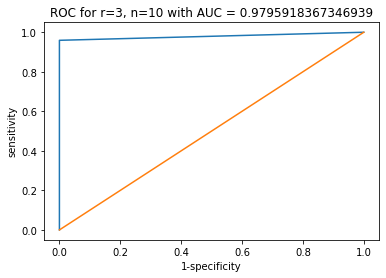

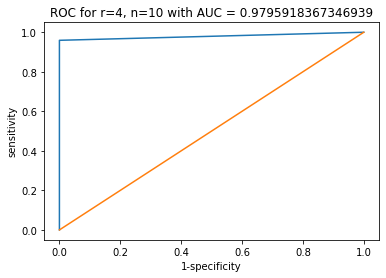

<Figure size 432x288 with 0 Axes>

In [86]:
i=0
for r in [3,4,5,6]:
    plt.figure(i)
    i+= 1
    AUC_2('testc1.txt', 'labels_c1.txt', 'chunksc1.txt', r, 10)
    
# We find the highest AUC for language Xhosa and the lowest AUC for Middle-English. 
# Middle-English looks the most alike English, thus is hard to distinguish from the self-language,
# resulting in a poor AUC value

0.9795918367346939

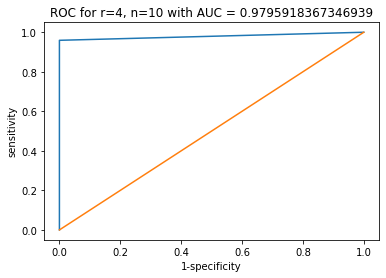

In [76]:
AUC_2('testc1.txt', 'labels_c1.txt', 'chunksc1.txt', 4, 10)

0.9693877551020409

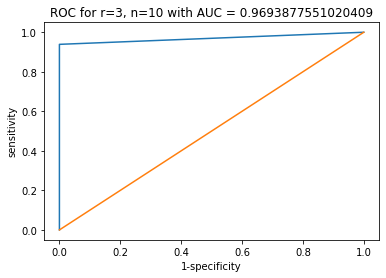

In [77]:
AUC_2('testc11.txt', 'labels_c1.txt', 'chunksc1.txt', 3, 10)

0.9795918367346939

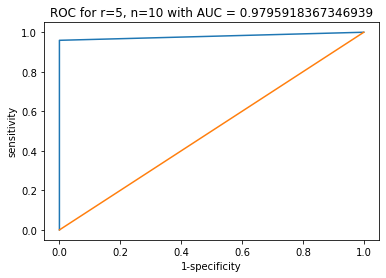

In [87]:
AUC_2('testc111.txt', 'labels_c1.txt', 'chunksc1.txt', 5, 10)

0.979591836734694

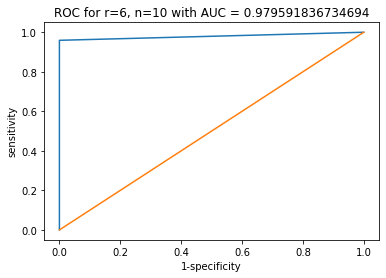

In [89]:
AUC_2('testc1111.txt', 'labels_c1.txt', 'chunksc1.txt', 6, 10)

0.9693877551020409

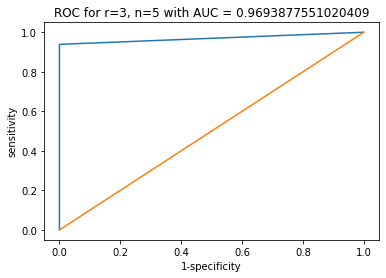

In [90]:
AUC_2('test_cert1_n5o.txt', 'labels_cert1_n5.txt', 'chunk_cert1_n5.txt', 3, 5)

0.9795918367346939

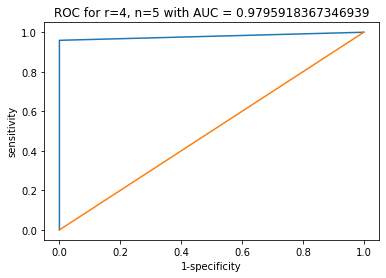

In [93]:
AUC_2('test_cert1_n5o4.txt', 'labels_cert1_n5.txt', 'chunk_cert1_n5.txt', 4, 5)